Importing libraries

In [6]:
import rasterio
from rasterio.plot import reshape_as_image
import matplotlib.pyplot as plt
import cv2
from skimage import img_as_ubyte

Function for reading the image from a raster file using the rasterio library, reshaping it as an image, converting it to a NumPy array of unsigned bytes and resizing

In [7]:
def loadingImages(raster_path):
    with rasterio.open(raster_path, "r", driver="JP2OpenJPEG") as src:
        raster_img = src.read()
    raster_img = reshape_as_image(raster_img)
    img = img_as_ubyte(raster_img)
    resized_image = cv2.resize(img, (500, 500), interpolation=cv2.INTER_AREA)
    return resized_image

Function for finding the descriptors and keypoints using ORB.

In [8]:
def findDescriptors(img):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    # keypoints_img = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0), flags=0)
    return keypoints, descriptors

Function for finding first 50 matches between descriptors of 2 images.

In [9]:
def matchingImages(img1, img2):
    # finding keypoints and descriptors
    keypoints1, descriptors1 = findDescriptors(img1)
    keypoints2, descriptors2 = findDescriptors(img2)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=0)
    return img_matches

First image loading

In [10]:
raster_path1="T36UYA_20160212T084052_B01.jp2"
img1 = loadingImages(raster_path1)

Second image loading

In [11]:
raster_path2="T36UYA_20160212T084052_B02.jp2"
img2 = loadingImages(raster_path2)

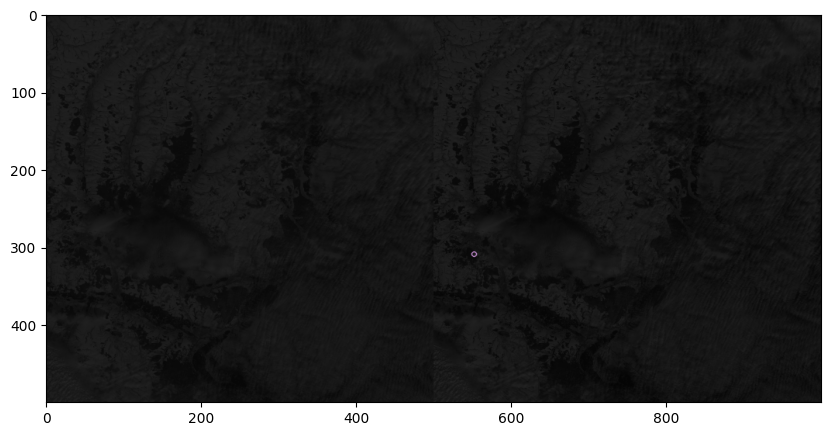

In [12]:
img_matches = matchingImages(img1, img2)
plt.figure(figsize=(10,10))
plt.imshow(img_matches)
plt.show()